In [1]:
# 파이썬 코드를 통해서 웹사이트 정보를 받아와주는 라이브러리
# 브라우저의 역할을 대신해준다.
import requests as req

In [3]:
# req.get("URL")= 내가 원하는 사이트 정보를 요청하는 방법
# response의 응답코드가 200번이면 성공
res=req.get('http://www.naver.com')
#200-300번대 : 연결되었다
# 400번대 요청 오류
# 500번대 서버, 응답 오류

In [4]:
# 응답데이터 중에 html 데이터만 출력
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

# Melon 사이트 요청

In [7]:
# response 406 -> 클라이언트의 요청문제!
# Why? 브라우저가 아닌 코드로 접근해서 멜론서버에서 데이터를 리턴하지 않는다.
# How? 사람인 척 속이는 작업(브라우저를 동반해서 보내기)
req.get("https://www.melon.com/chart/index.htm")

<Response [406]>

In [8]:
# user-agent= 브라우저의 정보를 담고있는 데이터
# 개발자도구 네트워크 탭에서 새로고침 후 type을 누르고 doc문서를 선택하고,
# headers 맨 마지막에 존재
head={"User-Agent":"Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Mobile Safari/537.36"}


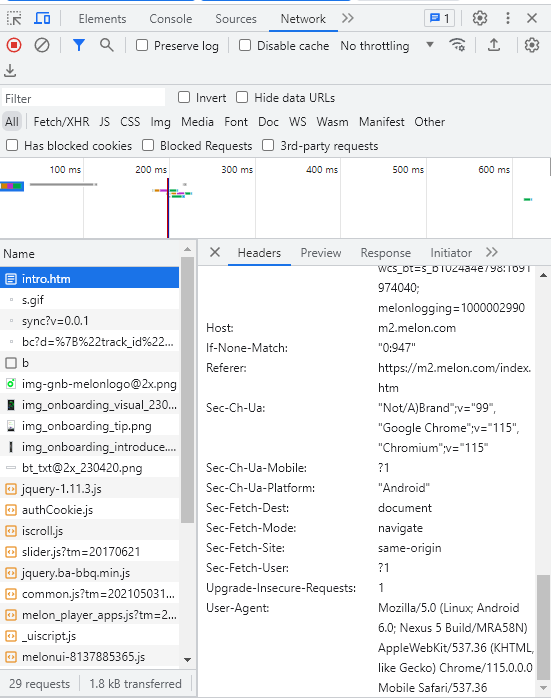

In [11]:
res=req.get("https://www.melon.com/chart/index.htm",headers =head)
# 헤더스에 헤드 데이터를 받아서 보내겠다

In [12]:
res.text

'\n\r\n\t\r\n\t\t<meta http-equiv="REFRESH" content="0;url=https://m2.melon.com/index.htm#2?">\r\n\t\r\n\r\n'

# 네이버 뉴스 타이틀만 수집

In [14]:
#연결이 잘 되었는지 확인하고 변수에 담기
res=req.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%B9%BC%EB%B6%80%EB%A6%BC")
res.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="칼부림 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'칼부림\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'칼부림\'의 네이버 뉴스검색 결과입니다."> <title>칼부림 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.n

# BeautifulSoup 라이브러리
- request로 받아온 데이터를 컴퓨터가 이해할 수 있는 데이터로 가공

In [ ]:
# beautifulSoup을 왜 쓰는지 필기문제로 나온다.

In [15]:
# stonesoup이 아닌 soup을 import!
from bs4 import BeautifulSoup as bs

In [17]:
soup = bs(res.text, "lxml")

In [26]:
# select 명령은 soup(가공된 html)에서 필요한 태그 정보를 수집
# 수집한 데이터는 태그와 콘텐츠가 합쳐진 요소(element)를 수집
#select one단수개
news_title=soup.select("a.news_tit")# .#선택자 select(태그, 선택자)
#F12 소스코드에서 더블클릭하면 복사가능
#크롤링할 때 어떤 태그에 속해있는지 찾는 것이 가장 어렵다.
news_title

[<a class="news_tit" href="https://www.mk.co.kr/article/10806770" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000BC_000000000000000005172049&amp;g=009.0005172049&amp;u='+urlencode(this.href));" target="_blank" title="“신림동 칼부림 범인, 내 악플러였다…검사실서 마주치니 끔찍”">“신림동 <mark>칼부림</mark> 범인, 내 악플러였다…검사실서 마주치니 끔찍”</a>,
 <a class="news_tit" href="https://www.seoul.co.kr/news/newsView.php?id=20230813500025&amp;wlog_tag3=naver" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=880000D1_000000000000000003384474&amp;g=081.0003384474&amp;u='+urlencode(this.href));" target="_blank" title="“제 악플러가 ‘신림동 칼부림’ 조선… 1m 거리서 노려봐”">“제 악플러가 ‘신림동 <mark>칼부림</mark>’ 조선… 1m 거리서 노려봐”</a>,
 <a class="news_tit" href="https://www.hankyung.com/society/article/2023081369307" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=8&amp;i=88000107_000000000000000004879306&amp;g=015.0004879306&amp;u='+urlencode(this.href));" target="_blank" title="'강남역 총기 난사·대전 칼부림' 예고 글 올린 30대 다 잡혔다">'강남역 총기 난사·대전 <mark>칼부

In [24]:
# 순수한 텍스트(콘텐츠) 정보만 저장
text_list=[]
for i in news_title:
    text_list.append(i.text)
text_list

['“신림동 칼부림 범인, 내 악플러였다…검사실서 마주치니 끔찍”',
 '“제 악플러가 ‘신림동 칼부림’ 조선… 1m 거리서 노려봐”',
 "'강남역 총기 난사·대전 칼부림' 예고 글 올린 30대 다 잡혔다",
 '외신도 주목한 \'Mudjima\' 칼부림... "범죄율 낮은 국가인데..."',
 '"대전 칼부림" "강남역 엽총파티"… 살인예고 30대男 2명 검거',
 '英BBC, 韓 \'묻지마 범죄\' 조명…"그래도 한국은 여전히 안전한 나라"',
 "칼부림, 묻지마 살인…'가석방 없는 종신형'이 대안일까[국회 다니는 변호사]",
 "'살인예고' 피의자 10대가 71명…전체 149명 중 48%",
 "잊을만하면 반복되는 '묻지마 칼부림' 史[타임라인]",
 '野 ‘묻지마 칼부림’ 가해자에 “처벌 강화보다 보호 우선”']

In [30]:
soup=bs(req.get("https://finance.naver.com/").text,"lxml")

In [39]:
finance_top=soup.select("#_topItems1>tr>th>a")#a태그에서 출발해 위로 올라간다.
 #선택자가 없으면 부모태그를 본다.
finance_top_list=[]
for i in finance_top:
    finance_top_list.append(i.text)
finance_top_list

['스킨앤스킨',
 'KODEX 200선물인버스2X',
 'KODEX 코스닥150선물인버스',
 '헝셩그룹',
 '대창',
 '서남',
 '원익피앤이',
 '서원',
 '코리아나',
 'LS전선아시아',
 '에이프로젠바이오로직스',
 '에이프로젠',
 'KODEX 인버스',
 '모비스',
 'TPC']

In [33]:
soup.select("#_topItems1>tr>th>a")

<html lang="ko">
<head>
<title>네이버 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230808201105/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/stati

In [41]:
soup.select("#_topItems1")

[<tbody id="_topItems1">
 <tr class="down">
 <th scope="row"><a href="/item/main.naver?code=159910" onclick="clickcr(this, 'spe.slist', '159910', '1', event);">스킨앤스킨</a></th>
 <td>153</td>
 <td><em class="bu_p bu_pdn"><span class="blind">하락</span></em> 16</td>
 <td> <em class="down"> -9.47% </em> </td>
 </tr>
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=252670" onclick="clickcr(this, 'spe.slist', '252670', '2', event);">KODEX 200선물인버스2X</a></th>
 <td>2,575</td>
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 35</td>
 <td> <em class="up"> +1.38% </em> </td>
 </tr>
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=251340" onclick="clickcr(this, 'spe.slist', '251340', '3', event);">KODEX 코스닥150선물인버스</a></th>
 <td>3,650</td>
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 90</td>
 <td> <em class="up"> +2.53% </em> </td>
 </tr>
 <tr class="up">
 <th scope="row"><a href="/item/main.naver?code=900270" onclick="clickcr(this, 's